# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#007fd4; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #007fd4"> Logistic Regression Classifier</p>

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)

In [9]:
# Define the style
rc = {
    "axes.facecolor": "#dcf5f7",
    "figure.facecolor": "#dcf5f7",
    "axes.edgecolor": "#000000",
    "grid.color": "#094863",
    "font.family": "arial",
    "axes.labelcolor": "#000000",
    "xtick.color": "#000000",
    "ytick.color": "#000000",
    "grid.alpha": 0.4,
}
sns.set(rc=rc)

In [47]:
class LRModel:

    def __init__(self):
        pass

    def categories_validation(self, train, test):
        print("The categories mismatch in training and test dataset")
        categorical_features_test = test.select_dtypes(include=['object']).columns.to_list()

        equal_mismatch = []

        for feature in categorical_features_test:
            train_unique = set(train[feature].unique()) 
            test_unique = set(test[feature].unique())
            
            if train_unique != test_unique:
                equal_mismatch.append(feature)
                
        return equal_mismatch
    
    def plot_mi_score(self, score):
        # Define a colorful color palette for the bars
        colors = sns.color_palette('YlGnBu', n_colors=len(score))
        
        plt.figure(figsize=(13, 7))
        sns.barplot(x=score.values, y=score.index, orient='h', palette=colors)
        plt.title('Mutual Information Scores', color='black', fontweight='bold')
        plt.ylabel('Features', color='black', fontweight='bold')
        plt.xticks(rotation=40, color='red')

        # Add the value labels to the bars
        for index, value in enumerate(score.values):
            plt.text(value, index, f'{value:.2f}', color='black', ha='left', va='center')

        plt.tight_layout()  
        return plt.show()



# Initialize the class
lrModel = LRModel()


## <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#007fd4; font-size:140%; text-align:left;padding: 0px;"> Read Data </p>

In [7]:
# Read the data from the source
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

In [11]:
# Create copies of the train and test DataFrames
df_train = train.copy()
df_test = test.copy()

In [12]:
print("Train Shape: ", df_train.shape)
print("Test Shape: ", df_test.shape)

Train Shape:  (1235, 29)
Test Shape:  (824, 28)


## <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#007fd4; font-size:140%; text-align:left;padding: 0px;"> Basic Data Exploration </p>

In [14]:
df_train.head(10)

,id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,nasogastric_reflux_ph,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
0,0,yes,adult,530001,38.1,132.0,24.0,cool,reduced,dark_cyanotic,more_3_sec,depressed,absent,slight,slight,less_1_liter,6.5,decreased,distend_small,57.0,8.5,serosanguious,3.4,yes,2209,0,0,no,died
1,1,yes,adult,533836,37.5,88.0,12.0,cool,normal,pale_cyanotic,more_3_sec,mild_pain,absent,moderate,none,more_1_liter,2.0,absent,distend_small,33.0,64.0,serosanguious,2.0,yes,2208,0,0,no,euthanized
2,2,yes,adult,529812,38.3,120.0,28.0,cool,reduced,pale_pink,less_3_sec,extreme_pain,hypomotile,moderate,slight,none,3.5,NaN,distend_large,37.0,6.4,serosanguious,3.4,yes,5124,0,0,no,lived
3,3,yes,adult,5262541,37.1,72.0,30.0,cold,reduced,pale_pink,more_3_sec,mild_pain,hypomotile,moderate,slight,more_1_liter,2.0,decreased,distend_small,53.0,7.0,cloudy,3.9,yes,2208,0,0,yes,lived
4,4,no,adult,5299629,38.0,52.0,48.0,normal,normal,normal_pink,less_3_sec,alert,hypomotile,none,slight,less_1_liter,7.0,normal,normal,47.0,7.3,cloudy,2.6,no,0,0,0,yes,lived
5,5,no,adult,529642,38.1,56.0,32.0,normal,normal,bright_pink,less_3_sec,depressed,hypomotile,none,none,more_1_liter,5.0,decreased,firm,49.0,8.0,cloudy,2.8,no,0,0,0,yes,lived
6,6,yes,adult,534787,38.3,36.0,16.0,cool,reduced,normal_pink,less_3_sec,severe_pain,normal,slight,none,more_1_liter,2.0,decreased,NaN,43.0,75.0,cloudy,1.0,no,3111,0,0,yes,euthanized
7,7,no,adult,529461,39.2,114.0,24.0,cool,reduced,pale_cyanotic,more_3_sec,mild_pain,hypomotile,moderate,slight,none,4.5,absent,distend_small,57.0,7.6,serosanguious,4.5,yes,2207,0,0,yes,died
8,8,no,adult,528742,37.4,48.0,12.0,cool,reduced,normal_pink,less_3_sec,alert,hypermotile,slight,slight,more_1_liter,7.0,normal,firm,40.0,7.8,cloudy,2.6,no,0,0,0,yes,lived
9,9,yes,adult,529640,38.3,129.0,48.0,cool,reduced,pale_pink,less_3_sec,depressed,absent,moderate,slight,none,4.4,NaN,NaN,57.0,4.9,cloudy,2.9,yes,3209,0,0,yes,died


In [13]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     1235 non-null   int64  
 1   surgery                1235 non-null   object 
 2   age                    1235 non-null   object 
 3   hospital_number        1235 non-null   int64  
 4   rectal_temp            1235 non-null   float64
 5   pulse                  1235 non-null   float64
 6   respiratory_rate       1235 non-null   float64
 7   temp_of_extremities    1196 non-null   object 
 8   peripheral_pulse       1175 non-null   object 
 9   mucous_membrane        1214 non-null   object 
 10  capillary_refill_time  1229 non-null   object 
 11  pain                   1191 non-null   object 
 12  peristalsis            1215 non-null   object 
 13  abdominal_distention   1212 non-null   object 
 14  nasogastric_tube       1155 non-null   object 
 15  naso

In [15]:
df_train.describe(exclude="object")

,id,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,lesion_3
count,1235.0000,1.235000e+03,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000
mean,617.0000,9.545004e+05,38.202186,79.574089,30.054251,4.382591,49.602429,21.388016,3.290931,3832.496356,14.612146,3.577328
std,356.6581,1.356403e+06,0.788668,29.108638,16.452066,1.937357,10.535800,26.676453,1.589195,5436.733774,193.705735,88.858953
min,0.0000,5.213990e+05,35.400000,30.000000,8.000000,1.000000,23.000000,3.500000,0.100000,0.000000,0.000000,0.000000
25%,308.5000,5.288000e+05,37.800000,53.000000,18.000000,2.000000,43.000000,6.600000,2.000000,2205.000000,0.000000,0.000000
50%,617.0000,5.297770e+05,38.200000,76.000000,28.000000,4.500000,48.000000,7.500000,3.000000,2209.000000,0.000000,0.000000
75%,925.5000,5.341450e+05,38.600000,100.000000,36.000000,6.000000,57.000000,9.100000,4.300000,3205.000000,0.000000,0.000000
max,1234.0000,5.305129e+06,40.800000,184.000000,96.000000,7.500000,75.000000,89.000000,10.100000,41110.000000,3112.000000,2209.000000


In [16]:
df_train.describe(include="object")

,surgery,age,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,rectal_exam_feces,abdomen,abdomo_appearance,surgical_lesion,cp_data,outcome
count,1235,1235,1196,1175,1214,1229,1191,1215,1212,1155,1214,1045,1022,1187,1235,1235,1235
unique,2,2,4,4,6,3,6,5,4,3,4,5,5,3,2,2,3
top,yes,adult,cool,reduced,pale_pink,less_3_sec,depressed,hypomotile,moderate,slight,more_1_liter,absent,distend_small,serosanguious,yes,yes,lived
freq,887,1160,700,724,284,834,429,664,543,758,604,493,482,570,929,668,574


<p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#007fd4; font-size:140%; text-align:left;padding: 0px;"> Data Checks to perform </p>

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

#### Check Missing values

In [21]:
# Null values
Column_with_na = df_train.isnull().sum()
Column_with_na[Column_with_na > 0]

temp_of_extremities       39
peripheral_pulse          60
mucous_membrane           21
capillary_refill_time      6
pain                      44
peristalsis               20
abdominal_distention      23
nasogastric_tube          80
nasogastric_reflux        21
rectal_exam_feces        190
abdomen                  213
abdomo_appearance         48
dtype: int64

In [24]:
## Here we will check the percentage of nan values present in each feature
feature_na = [feature for feature in df_train.columns if df_train[feature].isnull().sum() > 0 ]

for feature in feature_na:
    print(feature, np.round(df_train[feature].isnull().mean() * 100,4), " % missing")

temp_of_extremities 3.1579  % missing
peripheral_pulse 4.8583  % missing
mucous_membrane 1.7004  % missing
capillary_refill_time 0.4858  % missing
pain 3.5628  % missing
peristalsis 1.6194  % missing
abdominal_distention 1.8623  % missing
nasogastric_tube 6.4777  % missing
nasogastric_reflux 1.7004  % missing
rectal_exam_feces 15.3846  % missing
abdomen 17.247  % missing
abdomo_appearance 3.8866  % missing


In [26]:
# Null valuse percentage greater than 10%
columns_with_null_values_total = (df_train.isnull().sum() / len(df_train)) * 100
columns_with_null_values_percentage = columns_with_null_values_total[columns_with_null_values_total > 10].sort_values(ascending=False)

columns_with_null_values_percentage

abdomen              17.246964
rectal_exam_feces    15.384615
dtype: float64

<b>observation:</b> There are many missing values. The features abdomen, and rectal_exam_feces are missing more than 10%

Let's plot some diagram for this relationship

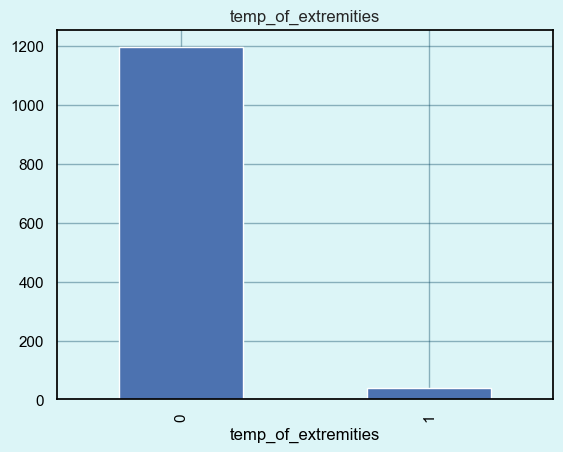

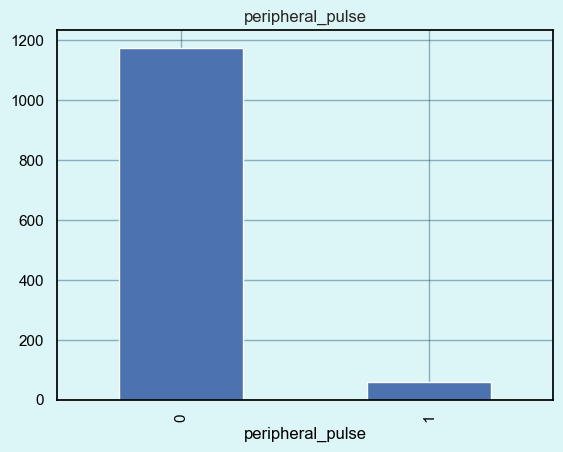

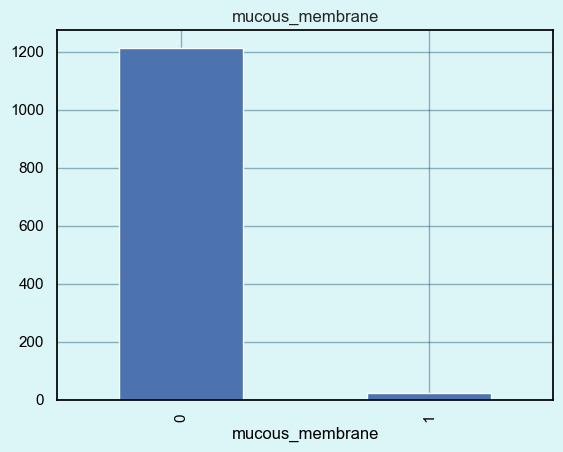

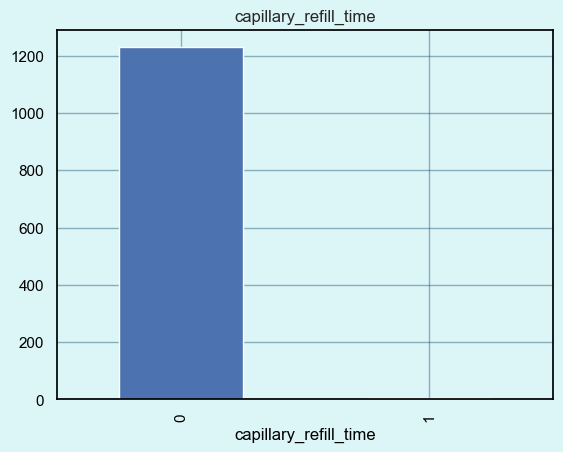

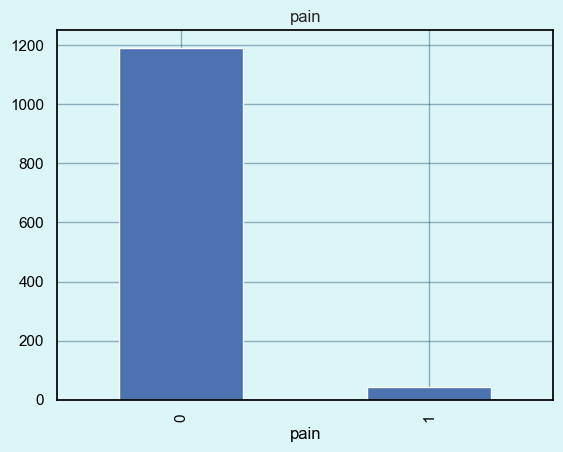

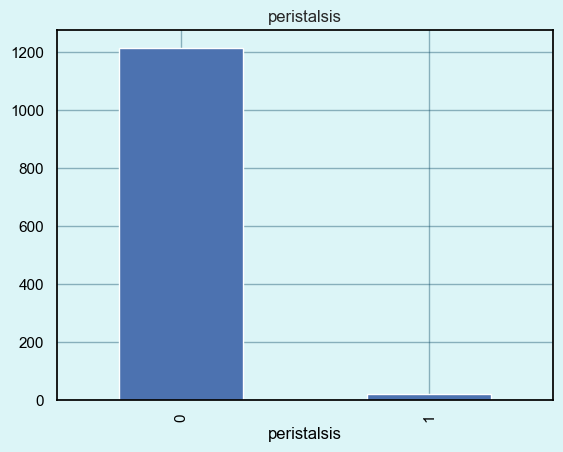

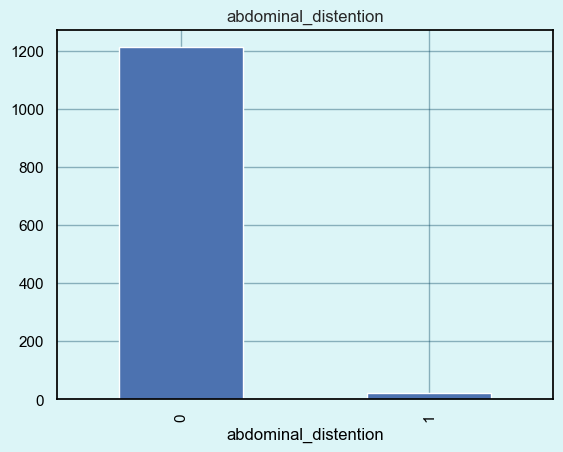

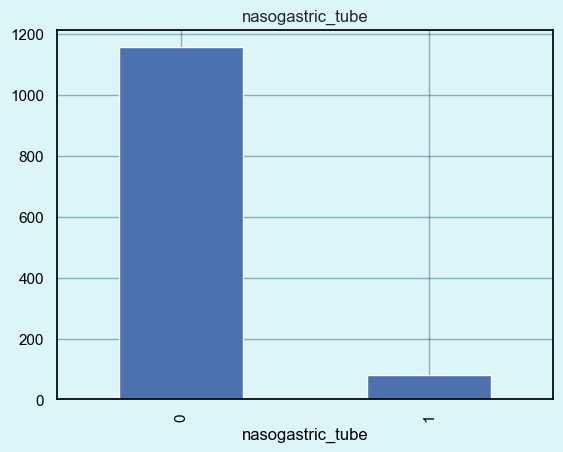

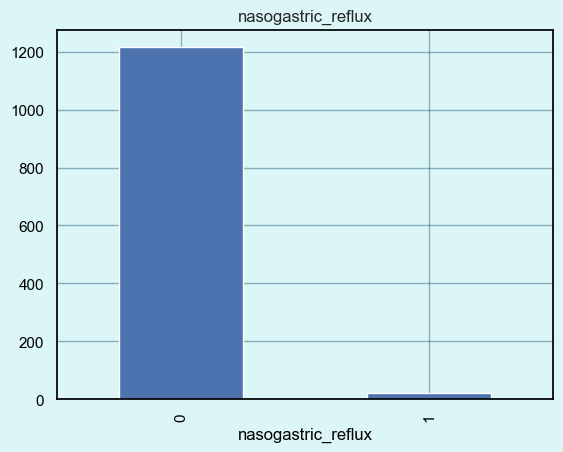

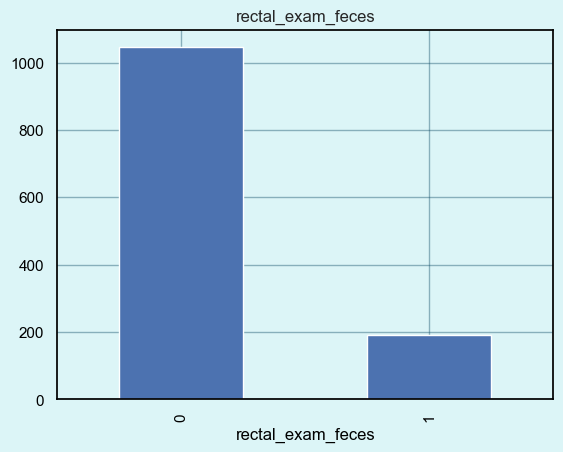

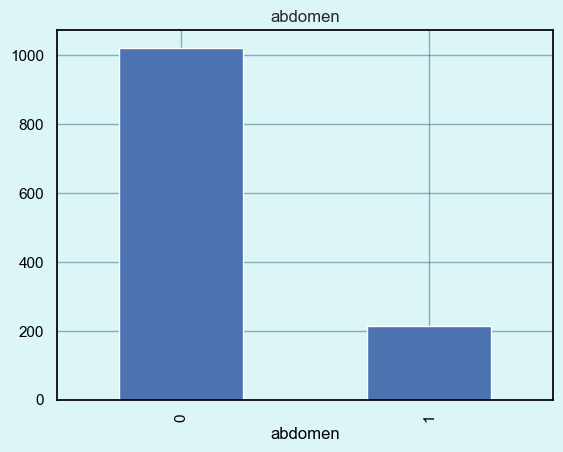

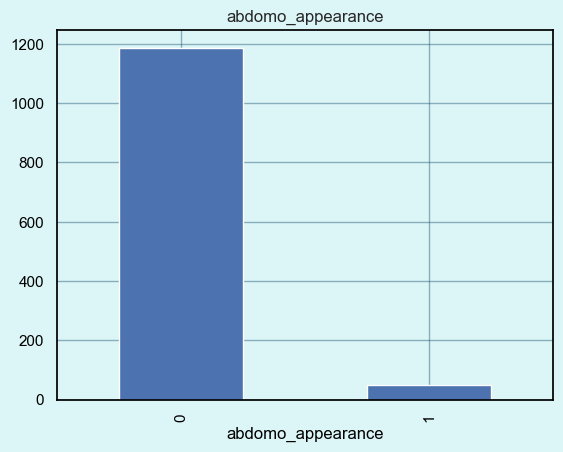

In [28]:
for feature in feature_na:
    data = df_train.copy()
    
    # let's make a variable that indicates 1 if the observation was missing or zero otherwise
    data[feature] = np.where(data[feature].isnull(), 1, 0)
    
    # let's calculate the mean Stroke where the information is missing or present
    data.groupby(feature)["outcome"].count().plot.bar()
    plt.title(feature)
    plt.show()

Here With the relation between the missing values and the dependent variable is clearly visible.So We need to replace these nan values with something meaningful

#### Check Duplicates

In [29]:
df_train.duplicated().sum()

0

In [31]:
df_test.duplicated().sum()

0

#### Check the number of unique values of each column

To better organize our data, let's divide our features into two types: 
1) categorical 

2) numerical.

In [32]:
feature_cat = df_train.select_dtypes(include = ["object"]).columns.to_list()
print("Categorical Features:", feature_cat)

feature_num = df_train.select_dtypes(exclude = ["object"]).columns.to_list()
print("Numerical Features:",feature_num)

Categorical Features: ['surgery', 'age', 'temp_of_extremities', 'peripheral_pulse', 'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis', 'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux', 'rectal_exam_feces', 'abdomen', 'abdomo_appearance', 'surgical_lesion', 'cp_data', 'outcome']
Numerical Features: ['id', 'hospital_number', 'rectal_temp', 'pulse', 'respiratory_rate', 'nasogastric_reflux_ph', 'packed_cell_volume', 'total_protein', 'abdomo_protein', 'lesion_1', 'lesion_2', 'lesion_3']


In [33]:
print("Train Dataset Categorical Feature Uniqueness:")
print("*" * 60)
for feature in feature_cat:
    print('{}: Unique Count: {}\n {}\n'.format(feature, len(df_train[feature].unique()), df_train[feature].unique()))

Train Dataset Categorical Feature Uniqueness:
************************************************************
surgery: Unique Count: 2
 ['yes' 'no']

age: Unique Count: 2
 ['adult' 'young']

temp_of_extremities: Unique Count: 5
 ['cool' 'cold' 'normal' 'warm' nan]

peripheral_pulse: Unique Count: 5
 ['reduced' 'normal' nan 'absent' 'increased']

mucous_membrane: Unique Count: 7
 ['dark_cyanotic' 'pale_cyanotic' 'pale_pink' 'normal_pink' 'bright_pink'
 'bright_red' nan]

capillary_refill_time: Unique Count: 4
 ['more_3_sec' 'less_3_sec' nan '3']

pain: Unique Count: 7
 ['depressed' 'mild_pain' 'extreme_pain' 'alert' 'severe_pain' nan 'slight']

peristalsis: Unique Count: 6
 ['absent' 'hypomotile' 'normal' 'hypermotile' nan 'distend_small']

abdominal_distention: Unique Count: 5
 ['slight' 'moderate' 'none' 'severe' nan]

nasogastric_tube: Unique Count: 4
 ['slight' 'none' 'significant' nan]

nasogastric_reflux: Unique Count: 5
 ['less_1_liter' 'more_1_liter' 'none' nan 'slight']

rectal_ex

In [34]:
print("Train Dataset Numerical Feature Uniqueness:")
print("*" * 60)
for feature in feature_num:
    if len(df_train[feature].unique()) <= 5:
        print('{}: Unique Count: {}\n {}\n'.format(feature, len(df_train[feature].unique()), df_train[feature].unique()))
    else:
        print('{}: Unique Count: {}\n'.format(feature, len(df_train[feature].unique())))

Train Dataset Numerical Feature Uniqueness:
************************************************************
id: Unique Count: 1235

hospital_number: Unique Count: 255

rectal_temp: Unique Count: 43

pulse: Unique Count: 50

respiratory_rate: Unique Count: 37

nasogastric_reflux_ph: Unique Count: 26

packed_cell_volume: Unique Count: 49

total_protein: Unique Count: 83

abdomo_protein: Unique Count: 54

lesion_1: Unique Count: 57

lesion_2: Unique Count: 4
 [   0 1400 3111 3112]

lesion_3: Unique Count: 2
 [   0 2209]



In [44]:
mis_match = lrModel.categories_validation(df_train, df_test)
mis_match

The categories mismatch in training and test dataset


['pain', 'peristalsis', 'nasogastric_reflux', 'rectal_exam_feces']

<b>Observation:</b> Some columns contain inconsistent values that need to be addressed